In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import missingno as msno

In [2]:
df = pd.read_csv('./input/wind_dataset.csv')

In [3]:
df['DATE']=pd.to_datetime(df['DATE'])

In [4]:
df.shape

(6574, 9)

In [5]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [6]:
df.tail()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5
6573,1978-12-31,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0


In [7]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


Vidimo da neki podaci fale.

<AxesSubplot:>

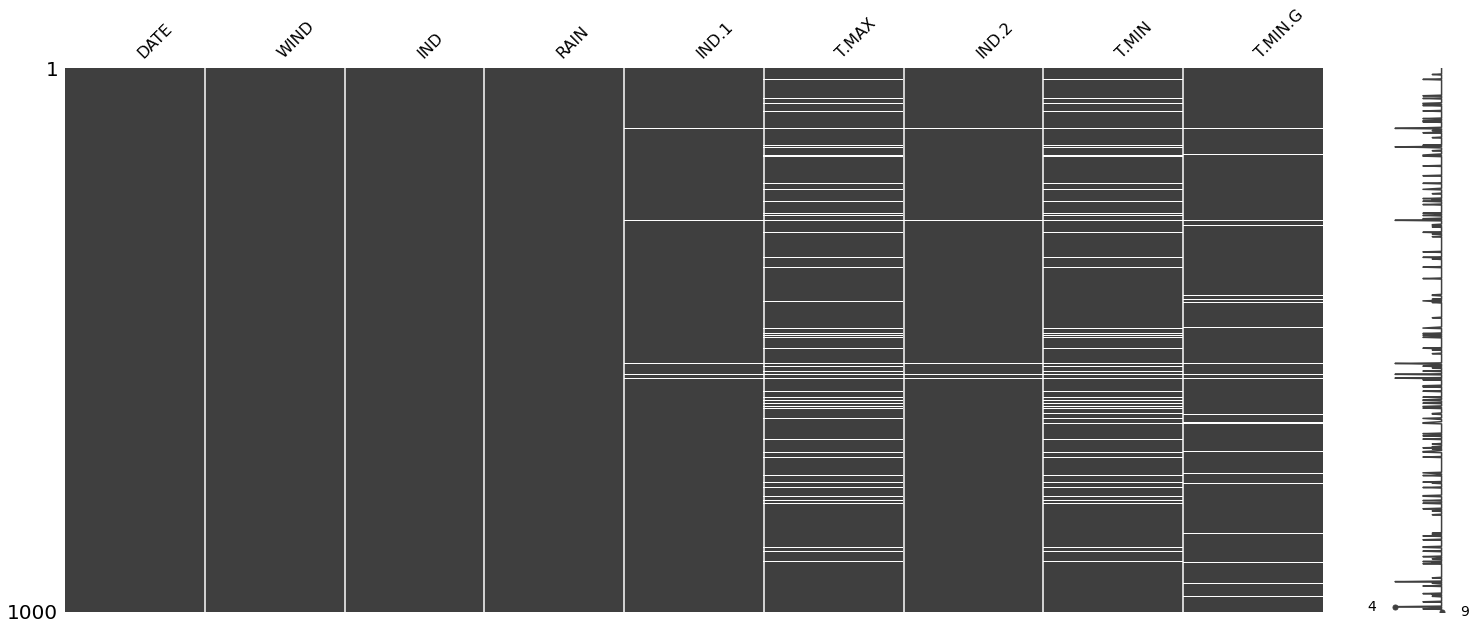

In [8]:
msno.matrix(df.sample(1000))

Primjetimo da cesto kada fali T.MAX fali i T.MIN, isto i za IND.2 i IND.1. Provjerimo to sa heatmapom i dendogramom.

<AxesSubplot:>

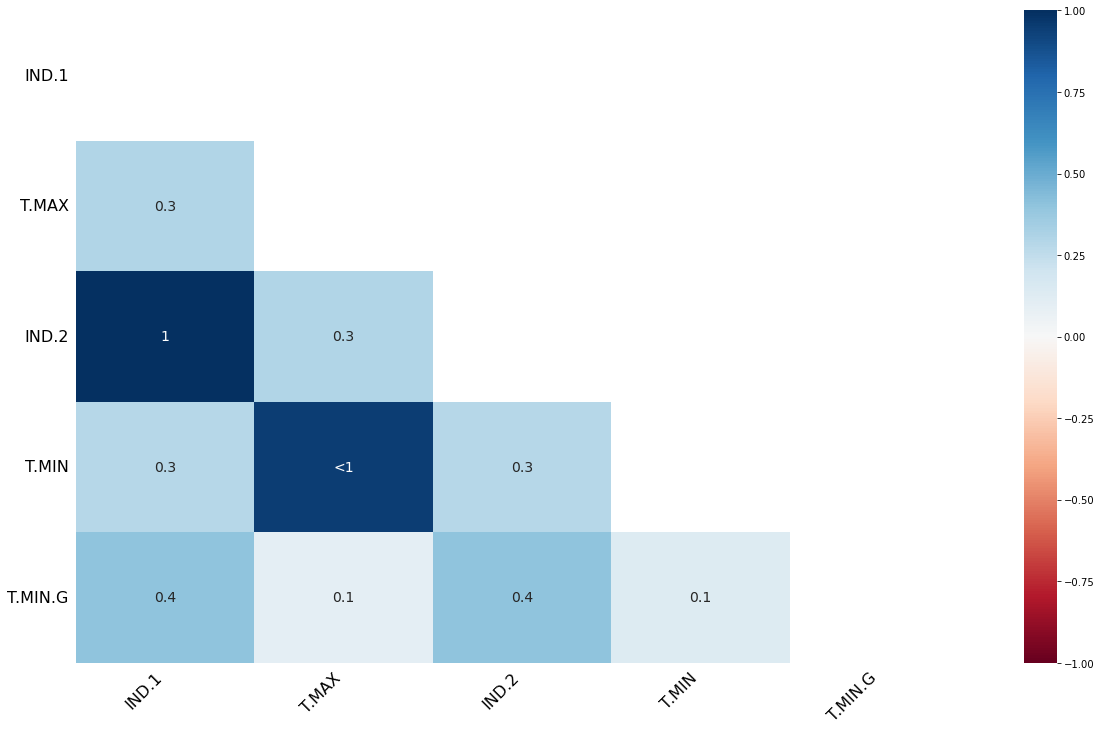

In [9]:
msno.heatmap(df)

<AxesSubplot:>

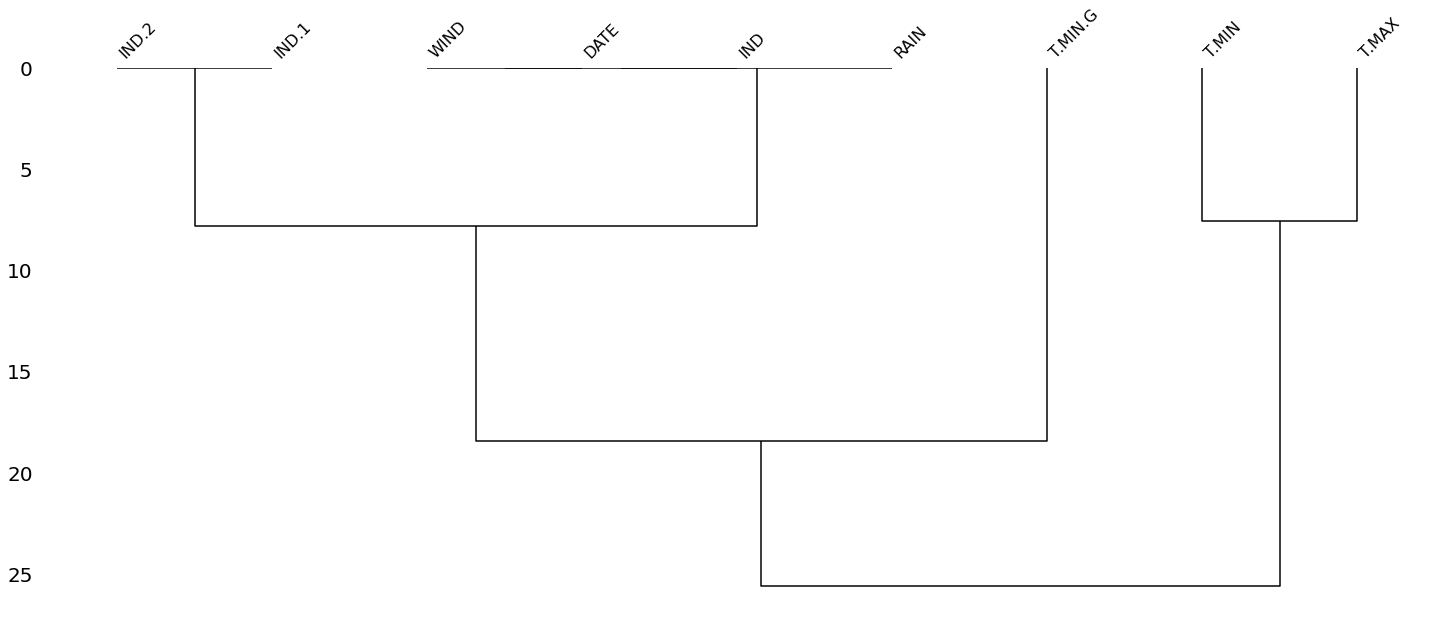

In [10]:
msno.dendrogram(df)

### Korelacija među značajkama

<AxesSubplot:>

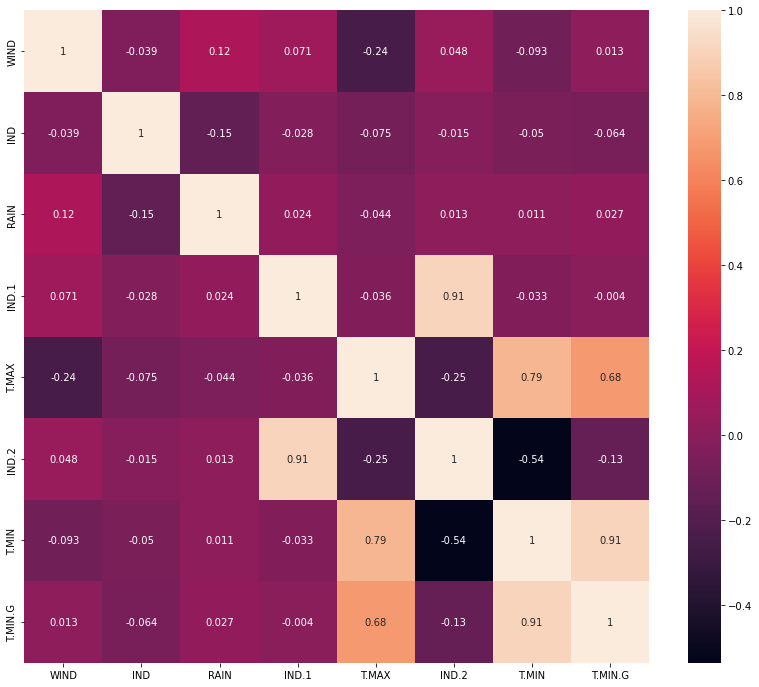

In [11]:
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(df.corr(), annot=True)

Iz heatmapa korelacije vidimo da postoje korelacije izmedu nekih značajki, ali da s brzinom vjetra ni jedna značajka nije u značajnijoj korelaciji od ostalih.

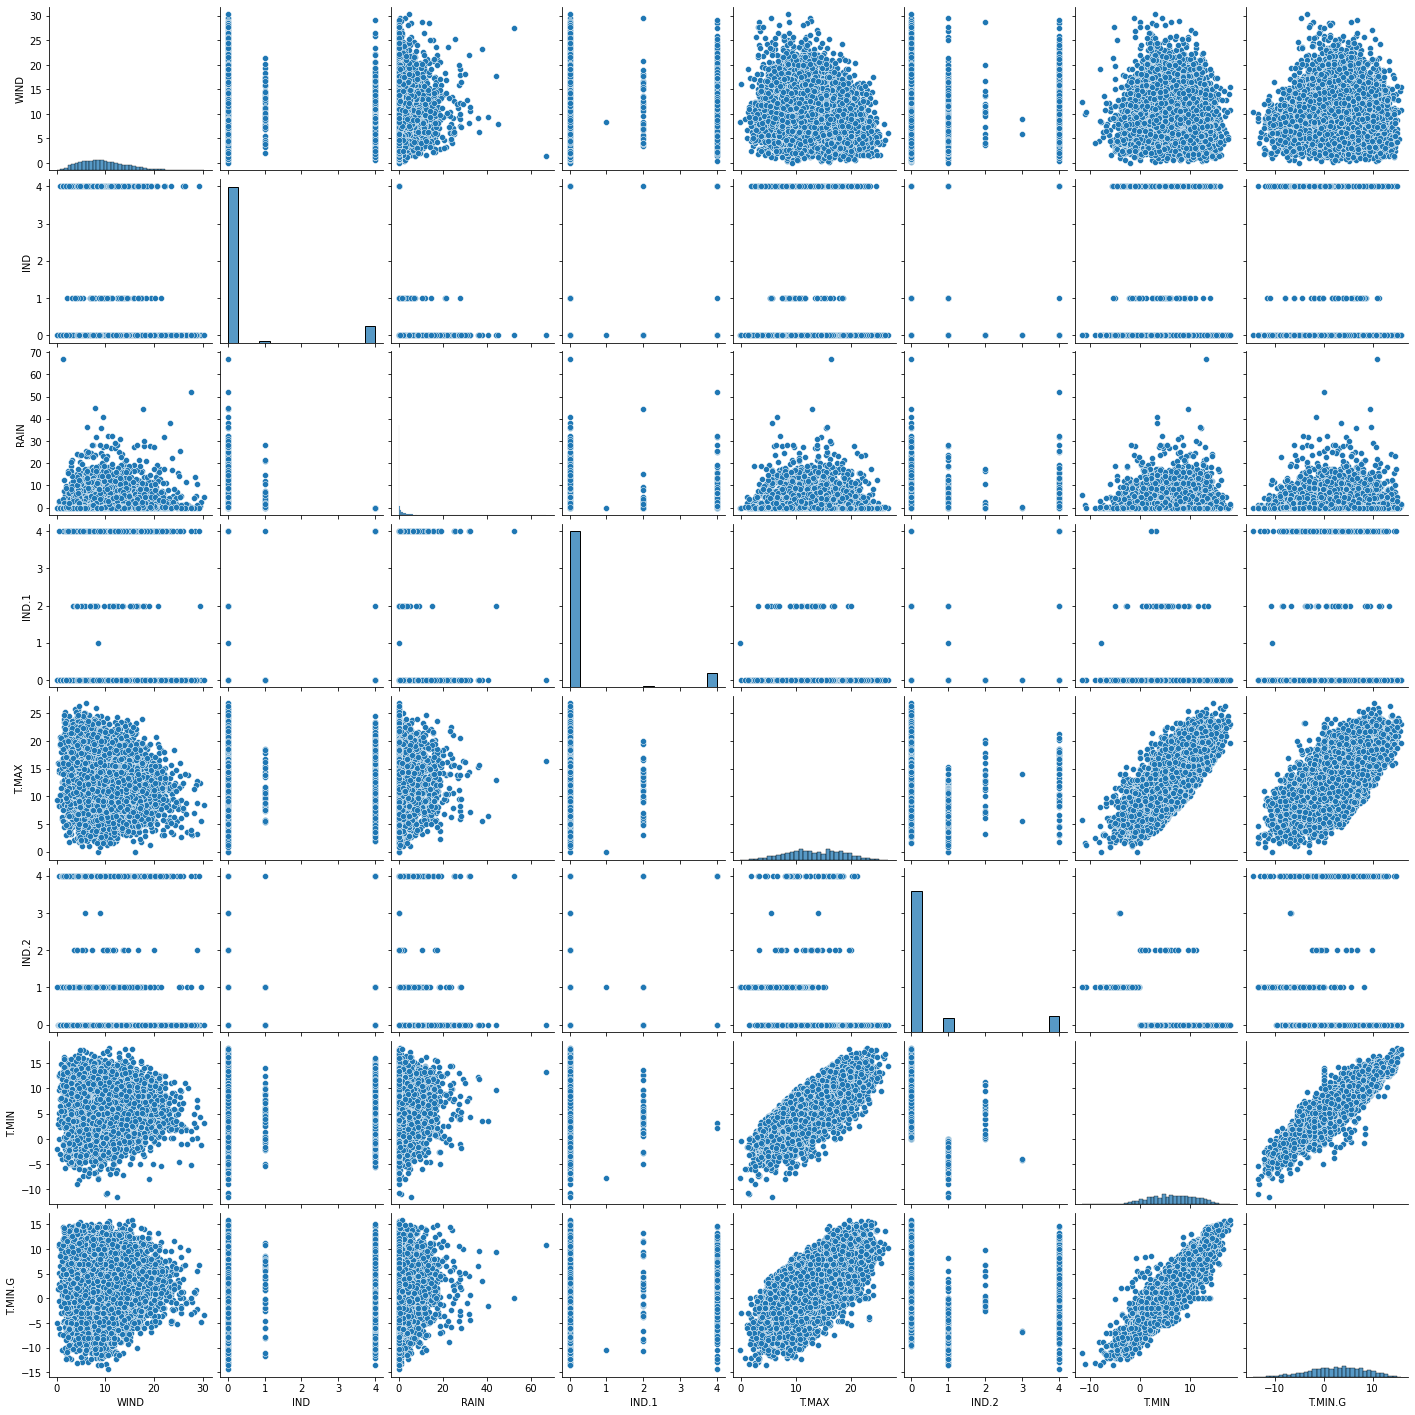

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='T.MAX', ylabel='WIND'>

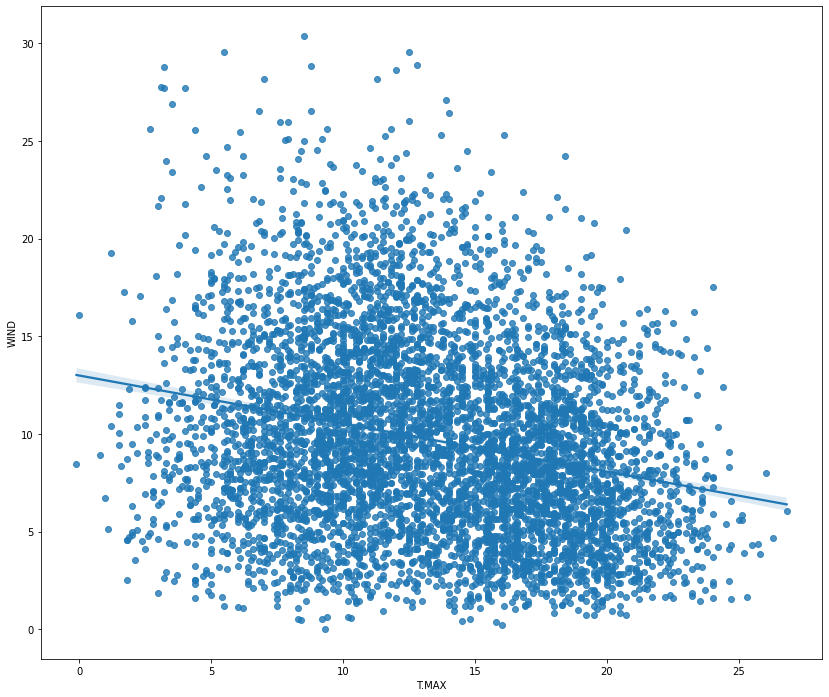

In [13]:
f , ax = plt.subplots(figsize = (14,12))
sns.regplot(x='T.MAX',y='WIND',data=df,scatter= True, fit_reg=True,ax=ax)

<AxesSubplot:xlabel='T.MIN', ylabel='WIND'>

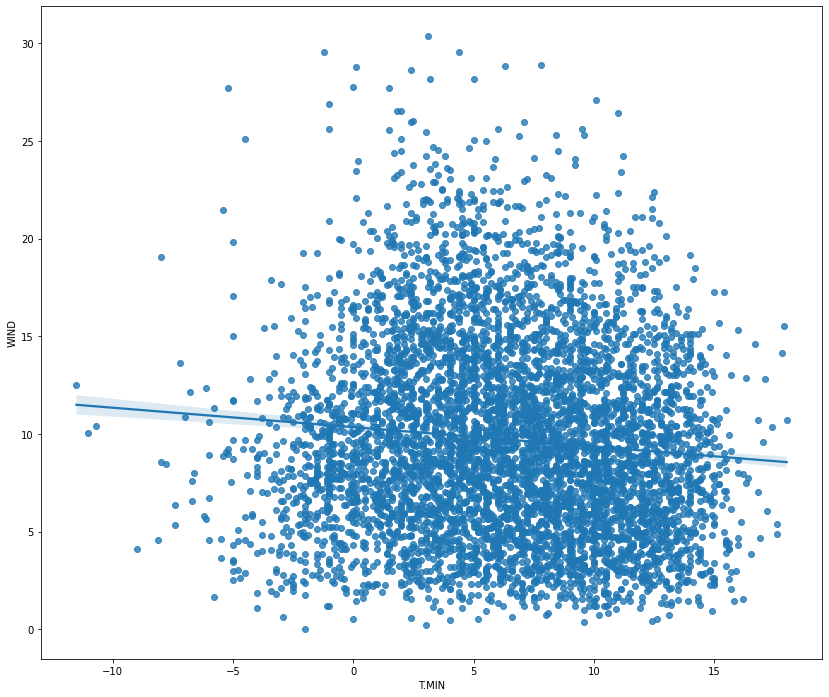

In [14]:
f , ax = plt.subplots(figsize = (14,12))
sns.regplot(x='T.MIN',y='WIND',data=df,scatter= True, fit_reg=True,ax=ax)

Primjecujemo da se s povećanjem temperature brzina vjetra donekle smanjuje.

<AxesSubplot:xlabel='RAIN', ylabel='WIND'>

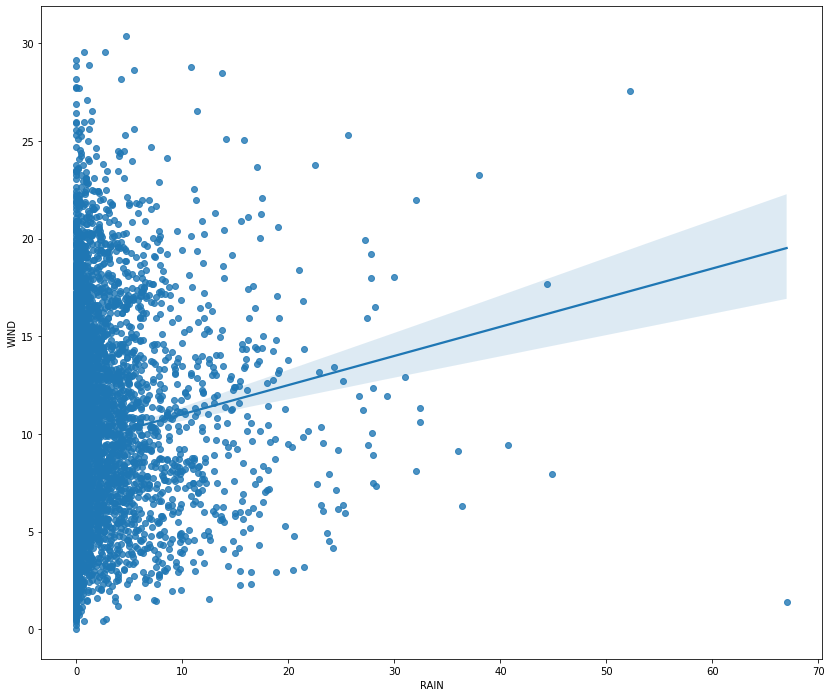

In [15]:
f , ax = plt.subplots(figsize = (14,12))
sns.regplot(x='RAIN',y='WIND',data=df,scatter= True, fit_reg=True,ax=ax)

### Boxplot značajki, te boxplot brzine vjetra unutar kategorija kategorijskih značajki (IND, IND.1, IND.2).

<AxesSubplot:xlabel='WIND'>

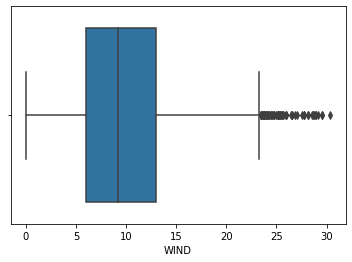

In [16]:
sns.boxplot(x=df['WIND'])

<AxesSubplot:xlabel='RAIN'>

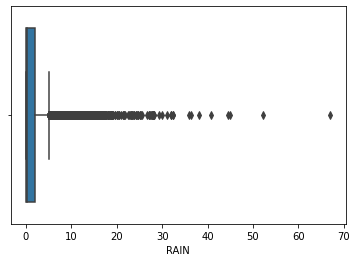

In [17]:
sns.boxplot(x=df['RAIN'])

Podaci za brzinu vjetra i kisu imaju dosta outlirea.

<AxesSubplot:xlabel='T.MAX'>

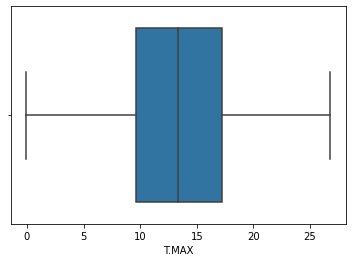

In [18]:
sns.boxplot(x=df['T.MAX'])

<AxesSubplot:xlabel='T.MIN'>

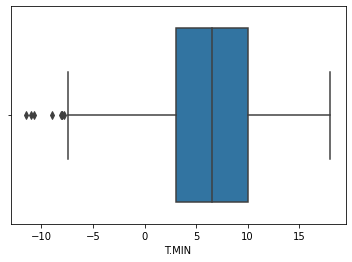

In [19]:
sns.boxplot(x=df['T.MIN'])

<AxesSubplot:xlabel='T.MIN.G'>

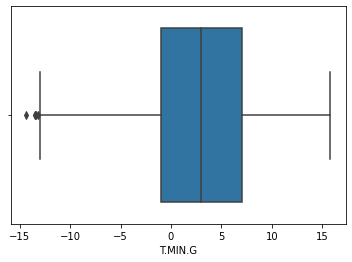

In [20]:
sns.boxplot(x=df['T.MIN.G'])

<AxesSubplot:>

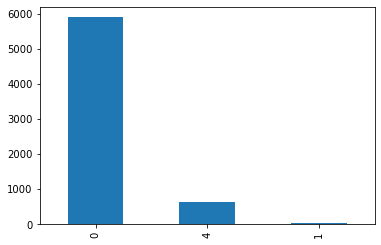

In [21]:
df['IND'].value_counts().plot(kind='bar')

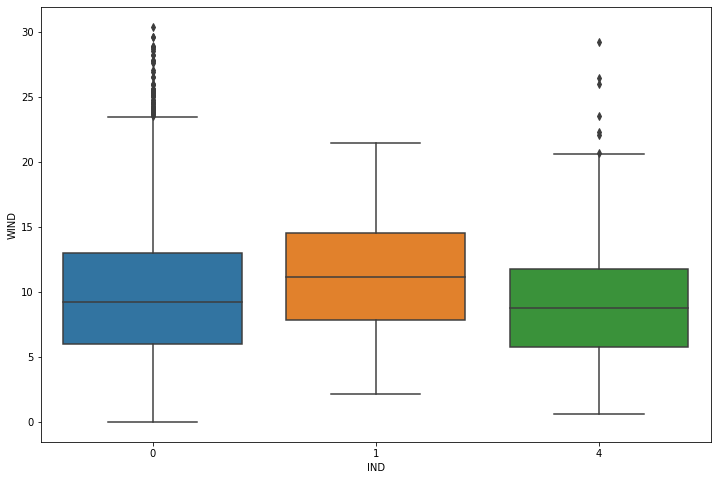

In [22]:
data = pd.concat([df['WIND'], df['IND']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='IND', y="WIND", data=df)

<AxesSubplot:>

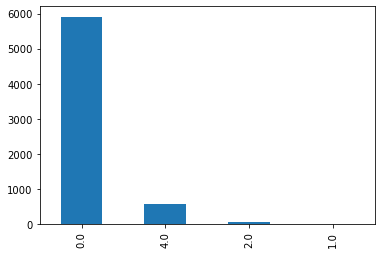

In [23]:
df['IND.1'].value_counts().plot(kind='bar')

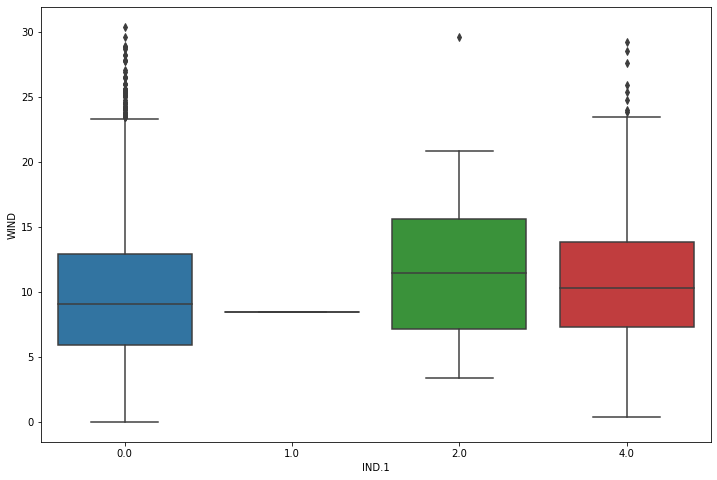

In [24]:
data = pd.concat([df['WIND'], df['IND.1']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='IND.1', y="WIND", data=df)

<AxesSubplot:>

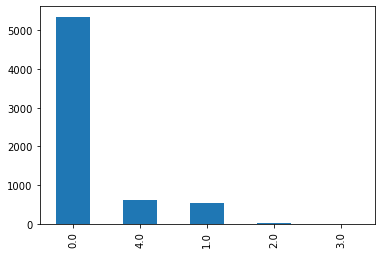

In [25]:
df['IND.2'].value_counts().plot(kind='bar')

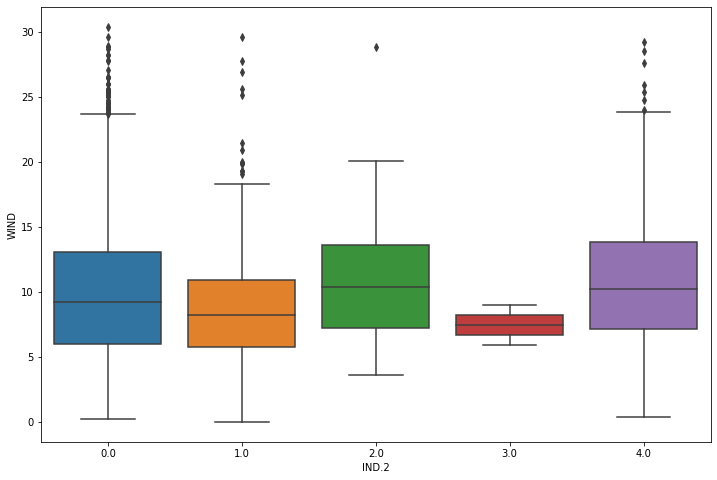

In [26]:
data = pd.concat([df['WIND'], df['IND.2']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='IND.2', y="WIND", data=df)

### Grafov u ovisnosti o datumu

<AxesSubplot:xlabel='DATE'>

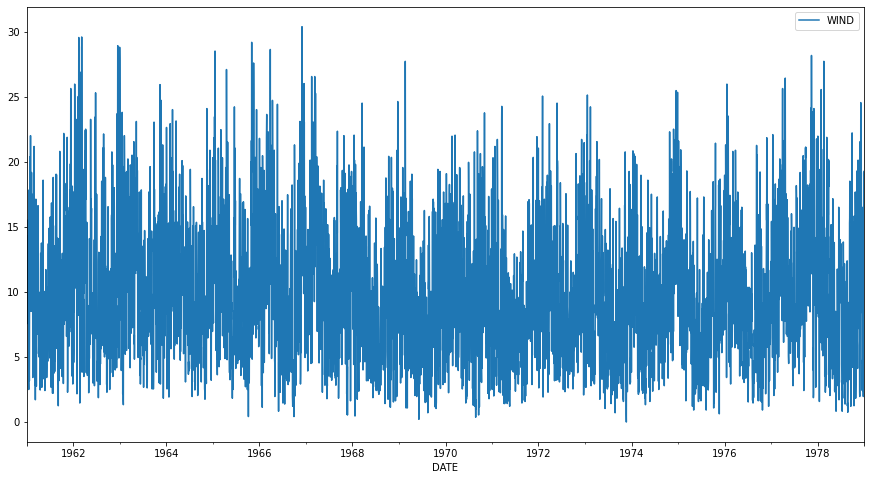

In [27]:
df.plot(x='DATE',y='WIND',figsize=(15,8))

Možemo primjetiti periodicnost brzine vjetra kroz godinu, oko kraja/pocetka godine obicno su vjetrovi jaci.

<AxesSubplot:xlabel='DATE'>

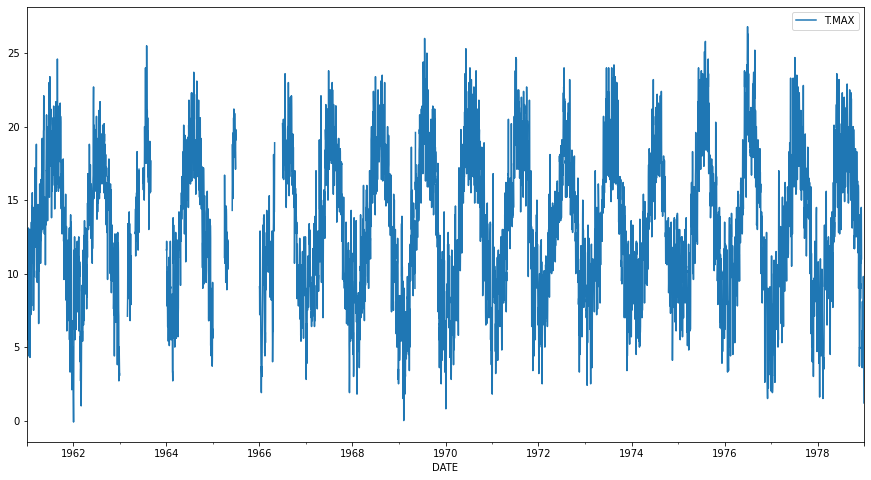

In [28]:
df.plot(x='DATE',y='T.MAX',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

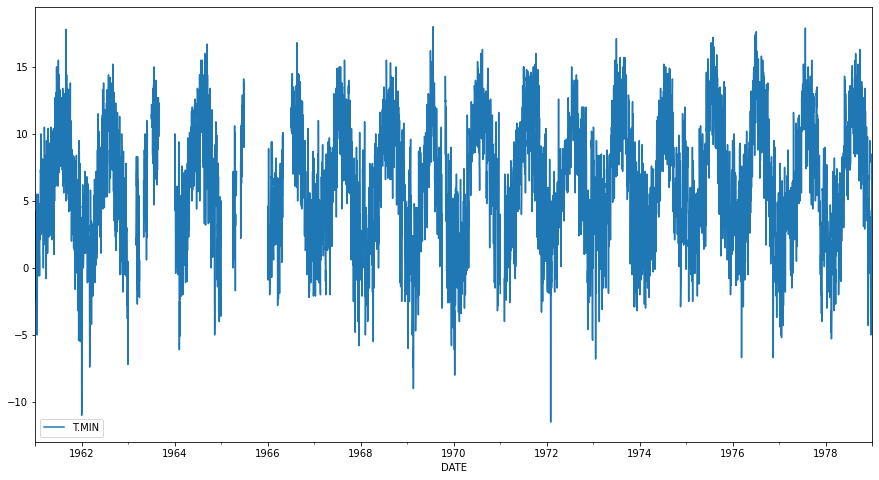

In [29]:
df.plot(x='DATE',y='T.MIN',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

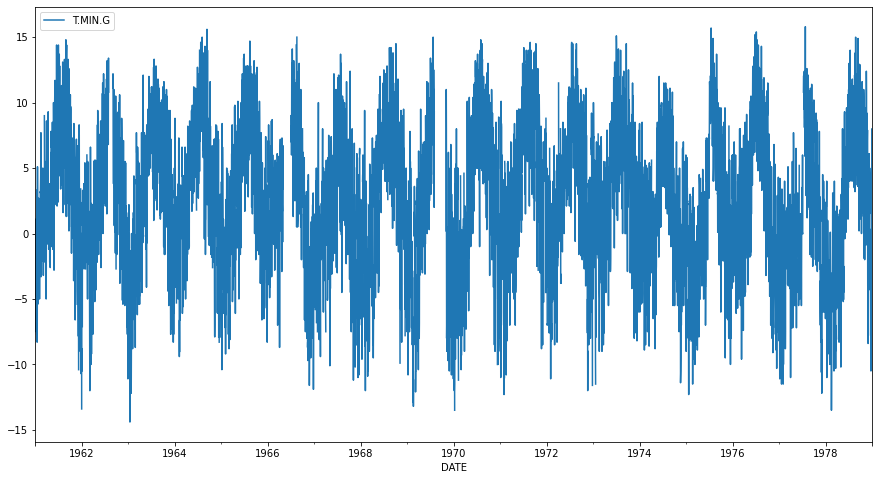

In [30]:
df.plot(x='DATE',y='T.MIN.G',figsize=(15,8))

Periodicnost temperature o datumu smo ocekivali. Kako se mjenjaju godisnja doba tako se sniziju ili povisuju temperature.